In [2]:
def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False

In [3]:
from dateutil.parser import parse

def is_date(string, fuzzy=False) -> bool:
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [105]:
import csv
import math as mt

with open('beauty_data.csv') as csvfile:
    datareader = csv.reader(csvfile)
    data = []
    for row in datareader:
            data.append(row)

print(data)

[['\ufeff', '', '', 'осредненные параметры', '', '', 'На конец режима', '', '', '', '', '', '', 'Стандартные условия', '', '', '', 'Линейные условия', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['', 'Глубина манометра', 'Dшт', 'Руст', 'Рзаб', 'Pлин', 'Руст', 'Рзаб', 'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб', 'Tлин', 'Дебит газа', 'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси', 'Дебит гааз', 'Дебит кон нестабильный', 'Дебит воды', 'Нэф', 'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)', 'Pсб', 'Pсб', 'Ro_g', 'Ro_c', 'Ro_w', 'Удельная плотность газа ', 'G_total', 'КГФ', 'КГФ'], ['№', 'м', 'мм', 'бара', 'бара', 'бара', 'бар', 'бар', 'бар', ' С', ' С', ' С', ' С', '1000 м3/сут', 'м3/сут', 'м3/сут', '1000 м3/сут', 'м3/сут', 'м3/сут', 'м3/сут', 'м', 'МПа', 'МПа', 'МПа', ' атм', ' бар', 'кг/м3', 'кг/м3', 'кг/м3', 'б/р', 'кг/с', 'г/м3', 'т/тыс.м3'], ['804', '3576.30', '7.94', '249.60', '370.10', '101.80', '249.00', '359.60', '101.80', '53.00', '

In [106]:
data_only_float = data[3:]
for j, row in enumerate(data_only_float[:]):
    for i in range(len(row)):
        elem = row[i]
        if not is_float(elem):
            row[i] = mt.nan
        else:
            row[i] = float(elem)
    if not mt.isnan(row[-1]):
        row[-2] = row[-1] * 1000
    row.pop(-1)
    if mt.isnan(row[-1]) and mt.isnan(row[-2]):
        data_only_float.remove(row)
print(len(data_only_float))

93


In [38]:
import numpy.ma as ma
masced_data = []
for row in data_only_float:
    masced_data.append(ma.masked_invalid(row))
cor_matrix = ma.corrcoef(masced_data)
print(cor_matrix)

[[1.0 0.9870357218367384 0.9540460491931856 ... 0.2744772393334941
  0.2981162023514468 0.28104253331507256]
 [0.9870357218367384 1.0 0.9897663719492955 ... 0.25781361537755915
  0.2928190452015178 0.267557366396944]
 [0.9540460491931856 0.9897663719492955 1.0 ... 0.23768190699176267
  0.28194093690323896 0.2500146781193506]
 ...
 [0.2744772393334941 0.25781361537755915 0.23768190699176267 ... 1.0
  0.9971645299183481 0.9998852131744984]
 [0.2981162023514468 0.2928190452015178 0.28194093690323896 ...
  0.9971645299183481 1.0 0.9986360668794277]
 [0.2810425333150725 0.267557366396944 0.25001467811935063 ...
  0.9998852131744983 0.9986360668794277 1.0]]


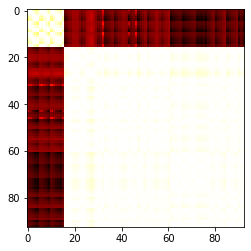

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cor_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [65]:
import csv
import math as mt

with open('really_beauty_data.csv', 'w+') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in data_only_float:
            csvwriter.writerow(row)

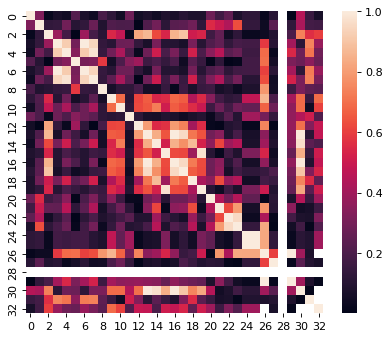

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(6,5), dpi= 80)
sns.heatmap(pd.DataFrame(data_only_float).corr().abs())

In [10]:
def average(m) -> int:
    return sum(m) / len(m)

In [11]:
def product_lists(x, y) -> []:
    product = []
    for x_elem, y_elem in zip(x, y):
        product.append(x_elem * y_elem)
    return product

In [8]:
def delete_nans(x, y) -> []:
    mask = []
    for elem_x, elem_y in zip(x, y):
        if not (math.isnan(elem_x) or math.isnan(elem_y)):
            mask.append(False)
        else:
            mask.append(True)
    x_without_nans = []
    y_without_nans = []
    for idx, is_nan in enumerate(mask):
        if not is_nan:
            x_without_nans.append(x[idx])
            y_without_nans.append(y[idx])
    return [x_without_nans, y_without_nans]

In [6]:
import numpy as np
import math

def corr(x, y, with_nans=True) -> float:
    if with_nans:
        xy = delete_nans(x, y)
        x = xy[0]
        y = xy[1]
        
    if len(x) != len(y):
        return math.nan
    if len(x) == 0 or len(y) == 0:
        return math.nan

    x_minux_x_av = np.array(x) - average(x)
    y_minus_y_av = np.array(y) - average(y)
    sum_product = sum(product_lists(x_minux_x_av, y_minus_y_av))

    if sum_product == 0:
        return math.nan

    x_minux_x_av_square = product_lists(x_minux_x_av, x_minux_x_av)
    y_minus_y_av_square = product_lists(y_minus_y_av, y_minus_y_av)

    return sum_product / (math.sqrt(sum(x_minux_x_av_square) * sum(y_minus_y_av_square)))

In [121]:
my_corr_matrix = []
transposed_data = np.array(data_only_float).transpose()
for x in transposed_data:
    corr_vector = []
    for y in transposed_data:
        corr_vector.append(abs(corr(x, y)))
    my_corr_matrix.append(corr_vector)
print(my_corr_matrix)

[[1.0, 0.3247486172642382, 0.023673802786267302, 0.06721150804438278, 0.04803228382638284, 0.22252233526053314, 0.07201207505915774, 0.04135130720772757, 0.19016575285004444, 0.1254722361511473, 0.04879251279026884, 0.28617451116886233, 0.055178566588032704, 0.07642817834326365, 0.047744805511966686, 0.08385583765789813, 0.07106788428607619, 0.1029615549319441, 0.08066801817204873, 0.08296004666278163, 0.2789356244254298, 0.1725198713284802, 0.2479486401374773, 0.07565815340685167, 0.12131921882868536, 0.1212954104766706, 0.019663082264333883, 0.10963385423786494, nan, 0.007954100892098132, 0.4497818840925986, 0.08118721370864107], [0.3247486172642382, 1.0, 0.1332897836872502, 0.14029116621336613, 0.29023375589095746, 0.10572313134411415, 0.1323882209442957, 0.2734859552299479, 0.09052537526806875, 0.21143102889776266, 0.19854927390731134, 0.2035969209089419, 0.004838481473294116, 0.21210167962508017, 0.2932578970017366, 0.11565170779578077, 0.22911302635881767, 0.24218747365440968, 0.

NameError: NameError: name 'my_corr_matrix' is not defined

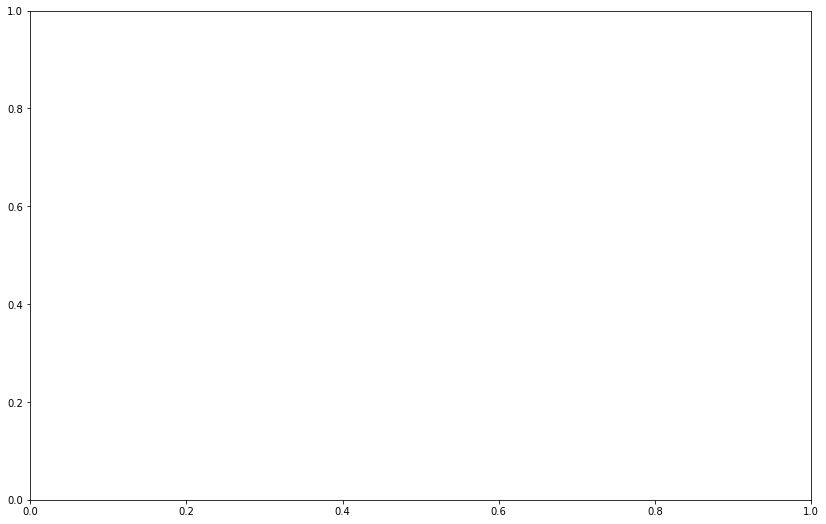

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(14, 9))

sns.heatmap(my_corr_matrix,center=0, cmap='blues', 
            xticklabels=data[1][:-1], yticklabels=data[1][:-1], 
            annot=True, fmt=".1g")
# plt.imshow(my_corr_matrix, cmap='gist_ncar')
# plt.show()

In [19]:
"""Works only with category classes."""
def freq(a_class, samples):
    freq_count = 0
    for sample in samples:
        if sample == a_class:
            freq_count += freq_count
    return freq_count

In [21]:
"""Works only with category classes."""
def count_entropy(samples, classes):
    entropy = 0
    samples_len = len(samples)
    for a_class in classes:
        proportion = freq(a_class, samples) / samples_len 
        entropy += proportion * mt.log(proportion, 2)
    return -entropy

In [0]:
def count_cond_entropy():
    

In [0]:
def calculate_gain_ration(key_feature, features):

[311.91 288.6  248.79 223.56 215.15 241.13 188.   178.   169.   162.
 230.   201.   172.   157.   141.   172.   385.42 295.5  255.68 233.96
 223.11 199.63 245.68 294.59 282.24 280.56 292.24 284.08 289.18 287.52
 254.84 243.23 219.04 270.   251.   236.   217.   200.   180.   169.
 160.   156.   153.   152.   152.   138.   131.   212.   194.   187.
 180.   198.   174.   171.   165.   162.   140.   154.   141.   139.
 132.   241.   216.   191.   177.   164.   219.   218.   200.   161.
 157.   154.   180.   178.   180.   224.   199.   201.   191.   192.
 222.   212.   204.   198.   186.   201.   182.   165.   153.   147.
 182.   145.   139.  ]


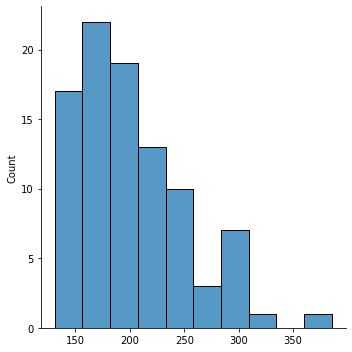

In [108]:
def draw_distribution(feature):
    sns.displot(feature)
    
transposed = np.array(data_only_float).transpose()
print(transposed[-1])
draw_distribution(transposed[-1])
#sns.kdeplot(transposed[-1], shade=True)

kgf_classes = []